In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [2]:
# Using kaggle api command for dataset
!kaggle datasets download -d prathamtripathi/drug-classification

drug-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
!chmod 600 /root/.kaggle/kaggle.json

In [7]:
!unzip /content/drug-classification.zip

Archive:  /content/drug-classification.zip
replace drug200.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [102]:
import pandas as pd
Drug_classify = pd.read_csv("/content/drug200.csv")

In [103]:
Drug_classify.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [104]:
Drug_classify.shape

(200, 6)

In [105]:
# Check for missing values
Drug_classify.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [106]:
# data types of the dataset
Drug_classify.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [107]:
Drug_classify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [108]:
drug_counts = Drug_classify['Drug'].value_counts()
print(drug_counts)


Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64


In [109]:
# replacing the DrugY by drugY
Drug_classify["Drug"].replace({'DrugY':'drugY'},inplace=True)

In [110]:
# Checking for duplicates
Drug_classify.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [111]:
# columns in the dataset
Drug_classify.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [112]:
Drug_classify.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


<ipython-input-113-3cc34e8ddb16>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




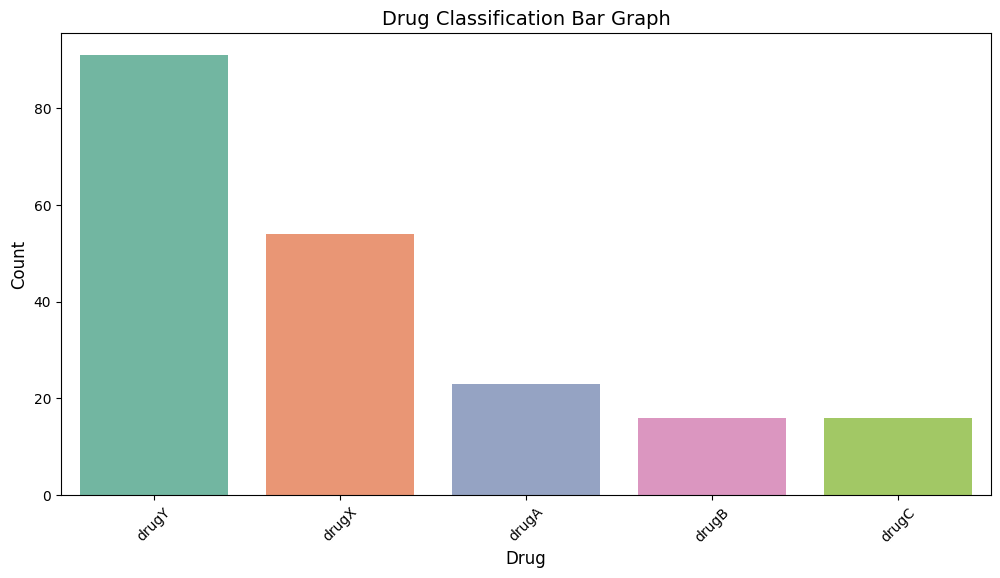

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by Drug
drug_count = Drug_classify.groupby('Drug')['Drug'].count().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=drug_count.index, y=drug_count.values, palette='Set2')

# Add labels and title
plt.xlabel('Drug', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Drug Classification Bar Graph', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [114]:
import plotly.express as px

# Assuming 'Drug_classify' is your DataFrame and it has been loaded properly

# Group data by Age and Cholesterol Level
grouped_data = Drug_classify.groupby(['Age', 'Cholesterol'])['Drug'].count().reset_index(name='Count')

# Create the interactive bar graph
fig = px.bar(grouped_data, x="Age", y="Count", color="Cholesterol",
             title="Interactive Bar Graph for Age and Cholesterol Level",
             labels={"Age": "Age Group", "Count": "Number of Patients"})

# Update layout for better readability
fig.update_layout(
    xaxis_title="Age Group",
    yaxis_title="Number of Patients",
    margin=dict(l=80, r=40, t=80, b=30),
    plot_bgcolor="white",
    paper_bgcolor="white",
)

# Update colors for Normal and High Cholesterol
fig.for_each_trace(lambda trace: trace.update(marker=dict(color='blue')) if trace.name == 'NORMAL' else trace.update(marker=dict(color='red')))

# Show the interactive bar graph
fig.show()


<Figure size 1200x600 with 0 Axes>

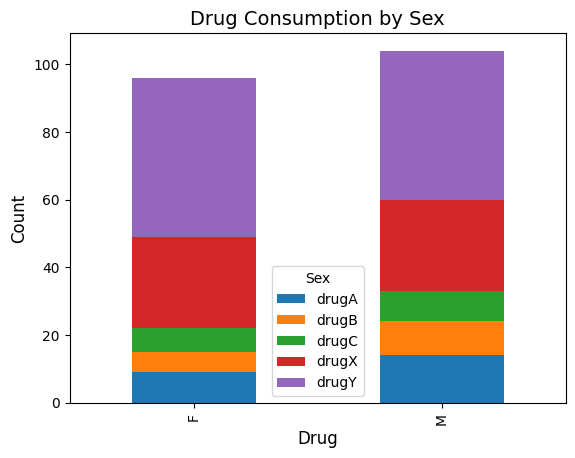

In [115]:
# Group data by Sex and Drug
drug_sex_count = Drug_classify.groupby(['Sex', 'Drug'])['Drug'].count().unstack()

# Create a bar chart
plt.figure(figsize=(12, 6))
drug_sex_count.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Drug', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Drug Consumption by Sex', fontsize=14)

# Add legend
plt.legend(title='Sex')

# Show the plot
plt.show()


In [116]:
Drug_classify

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [117]:
Drug_classify.drop([131,96, 98, 184,188,194,24,128,65,23], inplace=True)


In [118]:

Drug_classify["Drug"] = Drug_classify["Drug"].replace({True: 1, False: 0})


In [119]:
# encoding the categorical vairables sex and drugs as one hot encoding and others as label encoder
from sklearn.preprocessing import OneHotEncoder ,LabelEncoder
Drug_classify = pd.get_dummies(Drug_classify, columns=["Sex","Drug"])

In [120]:
Drug_classify

,Age,BP,Cholesterol,Na_to_K,Sex_F,Sex_M,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX,Drug_drugY
0,23,HIGH,HIGH,25.355,True,False,False,False,False,False,True
1,47,LOW,HIGH,13.093,False,True,False,False,True,False,False
2,47,LOW,HIGH,10.114,False,True,False,False,True,False,False
3,28,NORMAL,HIGH,7.798,True,False,False,False,False,True,False
4,61,LOW,HIGH,18.043,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
195,56,LOW,HIGH,11.567,True,False,False,False,True,False,False
196,16,LOW,HIGH,12.006,False,True,False,False,True,False,False
197,52,NORMAL,HIGH,9.894,False,True,False,False,False,True,False
198,23,NORMAL,NORMAL,14.020,False,True,False,False,False,True,False


In [121]:
Drug_classify["BP"]=Drug_classify["BP"].replace({'LOW':1,'NORMAL':2,'HIGH':3})
Drug_classify["Cholesterol"].replace({'LOW':1,'NORMAL':2,'HIGH':3},inplace=True)
Drug_classify

,Age,BP,Cholesterol,Na_to_K,Sex_F,Sex_M,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX,Drug_drugY
0,23,3,3,25.355,True,False,False,False,False,False,True
1,47,1,3,13.093,False,True,False,False,True,False,False
2,47,1,3,10.114,False,True,False,False,True,False,False
3,28,2,3,7.798,True,False,False,False,False,True,False
4,61,1,3,18.043,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
195,56,1,3,11.567,True,False,False,False,True,False,False
196,16,1,3,12.006,False,True,False,False,True,False,False
197,52,2,3,9.894,False,True,False,False,False,True,False
198,23,2,2,14.020,False,True,False,False,False,True,False


In [126]:
# Splitting the data into dependent and independent variavble
X = Drug_classify.iloc[:,:-5]
X

,Age,BP,Cholesterol,Na_to_K,Sex_F,Sex_M
0,23,3,3,25.355,1,0
1,47,1,3,13.093,0,1
2,47,1,3,10.114,0,1
3,28,2,3,7.798,1,0
4,61,1,3,18.043,1,0
...,...,...,...,...,...,...
195,56,1,3,11.567,1,0
196,16,1,3,12.006,0,1
197,52,2,3,9.894,0,1
198,23,2,2,14.020,0,1


In [123]:

Drug_classify["Drug_drugA"] = Drug_classify["Drug_drugA"].replace({True: 1, False: 0})
Drug_classify["Drug_drugB"] = Drug_classify["Drug_drugB"].replace({True: 1, False: 0})
Drug_classify["Drug_drugC"] = Drug_classify["Drug_drugC"].replace({True: 1, False: 0})
Drug_classify["Drug_drugX"] = Drug_classify["Drug_drugX"].replace({True: 1, False: 0})
Drug_classify["Drug_drugY"] = Drug_classify["Drug_drugY"].replace({True: 1, False: 0})
Drug_classify["Sex_F"] = Drug_classify["Sex_F"].replace({True: 1, False: 0})
Drug_classify["Sex_M"] = Drug_classify["Sex_M"].replace({True: 1, False: 0})


In [127]:
y = Drug_classify.iloc[:,6:]
y

,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX,Drug_drugY
0,0,0,0,0,1
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,0,1
...,...,...,...,...,...
195,0,0,1,0,0
196,0,0,1,0,0
197,0,0,0,1,0
198,0,0,0,1,0


In [128]:
X.shape,y.shape

((190, 6), (190, 5))

In [129]:
# Splitting the data into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [130]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [131]:
# Buidling the ANN model
from tensorflow.keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.losses import categorical_crossentropy


In [132]:
model = Sequential()
X.shape

(190, 6)

In [133]:
model.add(Dense(units=6,activation='relu',kernel_initializer='random_uniform')) # hidden layer 1
model.add(Dense(units=32,activation='relu',kernel_initializer='random_uniform')) # hidden layer 2
model.add(Dense(units=64,activation='relu',kernel_initializer='random_uniform')) # hidden layer 3
model.add(Dense(units=5,activation='softmax',kernel_initializer='random_uniform')) # Output layer
model.compile(optimizer='adam',loss="categorical_crossentropy", metrics=['accuracy'])

In [134]:
X_train.shape,y_train.shape

((152, 6), (152, 5))

In [135]:
model.fit(X_train,y_train,batch_size=32,epochs=350)

Epoch 1/350
5/5 [==============================] - 1s 4ms/step - loss: 1.6080 - accuracy: 0.3421
Epoch 2/350
5/5 [==============================] - 0s 3ms/step - loss: 1.6033 - accuracy: 0.5329
Epoch 3/350
5/5 [==============================] - 0s 4ms/step - loss: 1.5971 - accuracy: 0.5329
Epoch 4/350
5/5 [==============================] - 0s 5ms/step - loss: 1.5888 - accuracy: 0.5395
Epoch 5/350
5/5 [==============================] - 0s 4ms/step - loss: 1.5776 - accuracy: 0.4079
Epoch 6/350
5/5 [==============================] - 0s 5ms/step - loss: 1.5615 - accuracy: 0.4079
Epoch 7/350
5/5 [==============================] - 0s 4ms/step - loss: 1.5401 - accuracy: 0.4079
Epoch 8/350
5/5 [==============================] - 0s 4ms/step - loss: 1.5124 - accuracy: 0.4079
Epoch 9/350
5/5 [==============================] - 0s 3ms/step - loss: 1.4770 - accuracy: 0.4079
Epoch 10/350
5/5 [==============================] - 0s 3ms/step - loss: 1.4390 - accuracy: 0.4079
Epoch 11/350
5/5 [===========

In [136]:
import numpy as np
ypred=model.predict(X_test)
ypred=np.argmax(ypred, axis=1)

2/2 [==============================] - 0s 6ms/step


In [137]:
y_test=np.array(y_test)
y_test

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0]])

In [139]:
ypred

array([3, 4, 4, 0, 0, 4, 0, 4, 1, 2, 0, 0, 4, 4, 2, 1, 0, 4, 3, 1, 3, 0,
       4, 4, 4, 4, 0, 4, 4, 3, 4, 4, 4, 0, 0, 4, 3, 0])

In [141]:
X.iloc[0]

Age            23.000
BP              3.000
Cholesterol     3.000
Na_to_K        25.355
Sex_F           1.000
Sex_M           0.000
Name: 0, dtype: float64

In [142]:
X_train.shape,y_train.shape

((152, 6), (152, 5))

In [146]:
# calculate accuracy model

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test.argmax(axis=1), ypred)
accuracy = accuracy_score(y_test.argmax(axis=1), ypred)
report = classification_report(y_test.argmax(axis=1), ypred)
print("Confusion Matrix:\n", cm)
print("Accuracy Score:", accuracy)
print("Classification Report:\n", report)


Confusion Matrix:
 [[ 3  2  0  0  0]
 [ 0  1  0  0  0]
 [ 2  0  2  0  0]
 [ 6  0  0  3  0]
 [ 0  0  0  2 17]]
Accuracy Score: 0.6842105263157895
Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.60      0.37         5
           1       0.33      1.00      0.50         1
           2       1.00      0.50      0.67         4
           3       0.60      0.33      0.43         9
           4       1.00      0.89      0.94        19

    accuracy                           0.68        38
   macro avg       0.64      0.67      0.58        38
weighted avg       0.79      0.68      0.71        38

